Рассмотрим данные об  операциях клиентов на некоторой платформе. 
Загрузим 2 файла : 'user_data.csv'(содержит информацию о пользователе: идентификатор, является ли клиент премиальным, возраст);
                   'logs.csv'(содержит идентификатор пользователя, результат операции(успех – 1, нет – 0),платформу,
                              время в формате Unix)

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as p
%matplotlib inline
user_data = pd.read_csv('user_data.csv')
logs = pd.read_csv('logs.csv')

0. Посмотрим на данные из наших таблиц :

In [30]:
user_data.query('premium == True').shape[0]

406

406 премиальных клиентов.

In [13]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [16]:
user_data.shape[0]

2954

In [4]:
logs.head(10)

,client,success,platform,time
4490,39878,False,phone,1585412838
4491,81031,True,computer,1585401631
4492,62438,False,phone,1585479041
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362
4499,40921,True,phone,1585437692


In [18]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [19]:
logs.shape

(4500, 4)

In [21]:
logs.platform.nunique()

3

1.1. Посмотрим у какого клиента число успешных операций максимальное:

In [2]:
logs_table = logs.query('success == True').groupby('client').agg({'platform' : 'count'}).reset_index()
logs_table.sort_values(by = 'platform', ascending = False).head(10)


,client,platform
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41
1826,64064,40


In [3]:
m = logs_table.platform.max()
clients= logs_table.query('platform == 41').client
clients.sort_values()

332     12179
810     28719
1020    36165
1487    52870
1758    61468
1759    61473
2231    78349
2345    82563
2626    92584
Name: client, dtype: int64

In [34]:
platforms = logs_table.query('platform == 41').platform
platforms

332     41
810     41
1020    41
1487    41
1758    41
1759    41
2231    41
2345    41
2626    41
Name: platform, dtype: int64

1.2 Теперь выясним с какой платформы было совершено наибольшее количество успешных операций.

In [11]:
logs_pl = logs.query('success == True').groupby('platform').agg({'time' : 'count'})
logs_pl

,time
platform,
computer,1090
phone,2019
tablet,180


2. Посмотрим на премиальных клиентов и выясним какая платформа наиболее популярна среди них.

In [2]:
all_data = user_data.merge(logs, how = 'inner', on = 'client')
all_data.query('premium == True').groupby('platform').agg({'time': 'count'})

,time
platform,
computer,150
phone,246
tablet,24


3. Посмотрим распределение возраста клиентов в зависимости от типа клиента. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

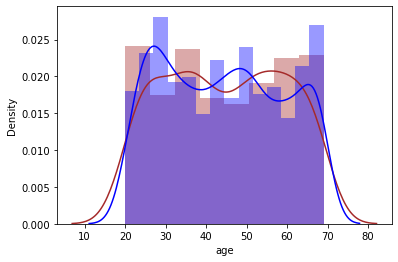

In [37]:
sns.distplot(all_data.query('premium == True').age,color = 'brown')
sns.distplot(all_data.query('premium == False').age,color = 'blue')

Премиальных клиентов больше чем 'обычных' в диапазонах: 30-40 лет, 50-65 лет.

4. Визуализируем распределение числа успешных операций.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='success'>

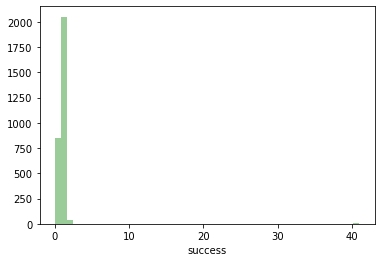

In [10]:
success_num = all_data.groupby('client').agg({'success' : 'sum'})
sns.distplot(success_num.success, kde = False, color = 'green')

5.Визуализируем число успешных операций, сделанных на  нашей платформе в зависимости от возраста.

<AxesSubplot:xlabel='age', ylabel='success'>

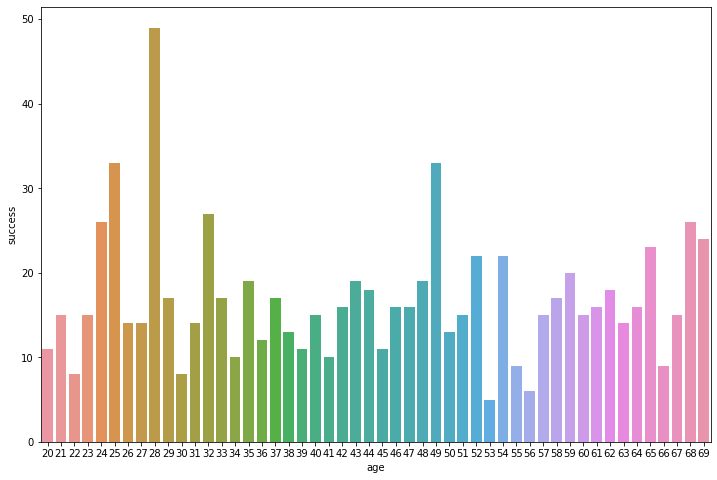

In [46]:
table = all_data.query('platform == "computer"').groupby('age', as_index=False).agg({'success' : 'sum'})
p.figure(figsize=(12, 8))
sns.barplot(x = 'age', y =  'success', data = table)


<AxesSubplot:xlabel='age', ylabel='count'>

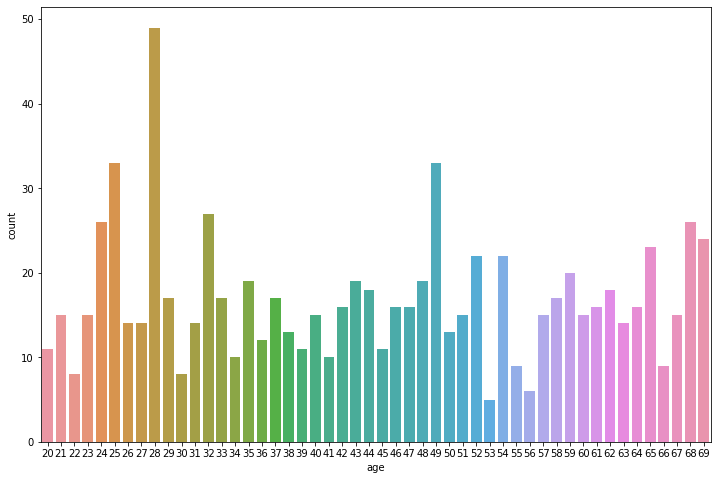

In [47]:
#Или аналогично:
table = all_data.query('platform == "computer" and success == True')
p.figure(figsize=(12, 8))
sns.countplot(x = 'age', data = table)


Клиенты в возрасте 28 лет совершили большинство успешных операций